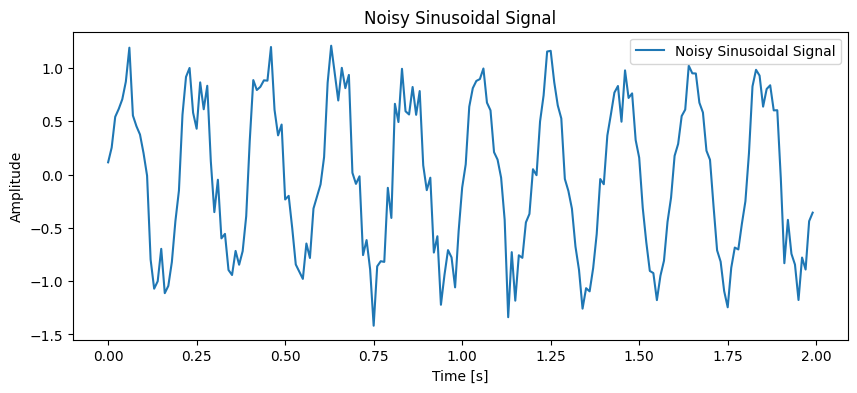

[0.00e+00 5.00e-05 1.00e-04 1.50e-04 2.00e-04 2.50e-04 3.00e-04 3.50e-04
 4.00e-04 4.50e-04 5.00e-04 5.50e-04 6.00e-04 6.50e-04 7.00e-04 7.50e-04
 8.00e-04 8.50e-04 9.00e-04 9.50e-04 1.00e-03 1.05e-03 1.10e-03 1.15e-03
 1.20e-03 1.25e-03 1.30e-03 1.35e-03 1.40e-03 1.45e-03 1.50e-03 1.55e-03
 1.60e-03 1.65e-03 1.70e-03 1.75e-03 1.80e-03 1.85e-03 1.90e-03 1.95e-03
 2.00e-03 2.05e-03 2.10e-03 2.15e-03 2.20e-03 2.25e-03 2.30e-03 2.35e-03
 2.40e-03 2.45e-03 2.50e-03 2.55e-03 2.60e-03 2.65e-03 2.70e-03 2.75e-03
 2.80e-03 2.85e-03 2.90e-03 2.95e-03 3.00e-03 3.05e-03 3.10e-03 3.15e-03
 3.20e-03 3.25e-03 3.30e-03 3.35e-03 3.40e-03 3.45e-03 3.50e-03 3.55e-03
 3.60e-03 3.65e-03 3.70e-03 3.75e-03 3.80e-03 3.85e-03 3.90e-03 3.95e-03
 4.00e-03 4.05e-03 4.10e-03 4.15e-03 4.20e-03 4.25e-03 4.30e-03 4.35e-03
 4.40e-03 4.45e-03 4.50e-03 4.55e-03 4.60e-03 4.65e-03 4.70e-03 4.75e-03
 4.80e-03 4.85e-03 4.90e-03 4.95e-03]


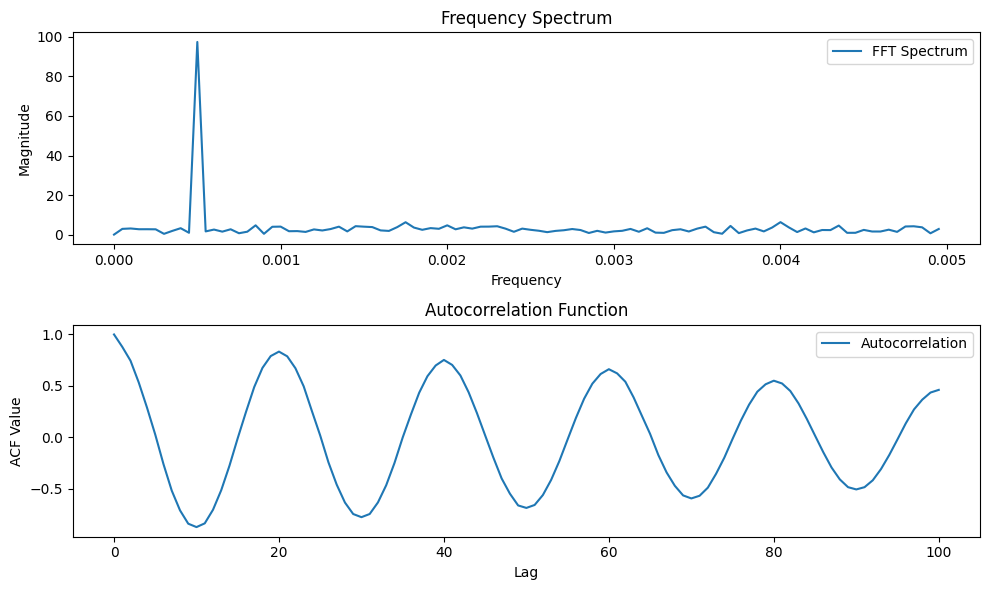

0.0005
Dominant Period: 2000.0 seconds


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from statsmodels.tsa.stattools import acf

def detect_cyclicity(time_series, sampling_rate=1):
    # FFT to detect dominant frequencies
    n = len(time_series)
    freq_spectrum = fft(time_series - np.mean(time_series))
    freqs = np.fft.fftfreq(n, d=sampling_rate)

    # Consider only positive frequencies
    positive_freqs = freqs[:n//2]
    positive_magnitudes = np.abs(freq_spectrum[:n//2])
    print(positive_freqs)
    # Find the dominant frequency (excluding zero frequency)
    dominant_freq = positive_freqs[np.argmax(positive_magnitudes[1:]) + 1]
    dominant_period = 1 / dominant_freq if dominant_freq != 0 else None

    # Autocorrelation to confirm periodicity
    lag_acf = acf(time_series, nlags=len(time_series)//2)

    # Plot results
    fig, axes = plt.subplots(2, 1, figsize=(10, 6))
    axes[0].plot(positive_freqs, positive_magnitudes, label='FFT Spectrum')
    axes[0].set_title('Frequency Spectrum')
    axes[0].set_xlabel('Frequency')
    axes[0].set_ylabel('Magnitude')
    axes[0].legend()

    axes[1].plot(lag_acf, label='Autocorrelation')
    axes[1].set_title('Autocorrelation Function')
    axes[1].set_xlabel('Lag')
    axes[1].set_ylabel('ACF Value')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    print(dominant_freq)
    return dominant_period

# Parameters
sampling_rate = 100  # Samples per second
duration = 2  # Duration in seconds
frequency = 5  # Frequency of the sinusoidal signal in Hz
amplitude = 1  # Amplitude of the sinusoidal signal
noise_amplitude = 0.2  # Amplitude of the white noise

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sinusoidal signal
sinusoidal_signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Add white noise
noise = noise_amplitude * np.random.normal(size=len(t))
noisy_signal = sinusoidal_signal + noise

# Plot the noisy signal
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, label='Noisy Sinusoidal Signal')
plt.title('Noisy Sinusoidal Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Detect cyclicity
dominant_period = detect_cyclicity(noisy_signal, sampling_rate)
print(f"Dominant Period: {dominant_period} seconds")